In [5]:
import sys
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import os
import cv2
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

sys.path.append('Datasets')
from StanfordDataset import StanfordDataset

sys.path.append('config')
import settings

sys.path.append('Preprocessings')
from StanfordPreprocessing import StanfordPreprocessing

sys.path.append('Postprocessing')
from StanfordPostprocess import postprocess_label

sys.path.append('Models')
from InceptionV3 import InceptionV3

import matplotlib.pyplot as plt

In [6]:
def read_labels(path):
    with open(path, 'r') as file:
        data = file.read()
    
    return np.array(data.split('\n'))

preprocessor = StanfordPreprocessing(read_labels(settings.LABELS_PATH), settings.IMAGE_HEIGHT, settings.IMAGE_WIDTH)

In [7]:
model = tf.keras.models.load_model("Artifacts/Models/v1/Model/tf")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 150, 150, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 150, 150, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [4]:
stanfordDataset = StanfordDataset(
    data_path=settings.DATA_PATH,
    label_path=settings.LABELS_PATH,
    batch_size=32
)

(train_ds, val_ds, test_ds) = stanfordDataset.create_data_pipelines(preprocessor)

In [5]:
model.evaluate(test_ds)

129/129 [==============================] - 355s 3s/step - loss: 0.2231 - dense_3_loss: 0.1522 - dense_1_loss: 0.0710 - dense_3_accuracy: 0.9879 - dense_1_accuracy: 0.9964


[0.22314393520355225,
 0.1521763801574707,
 0.07096751779317856,
 0.9878522753715515,
 0.9963557124137878]

1/1 [==============================] - 5s 5s/step


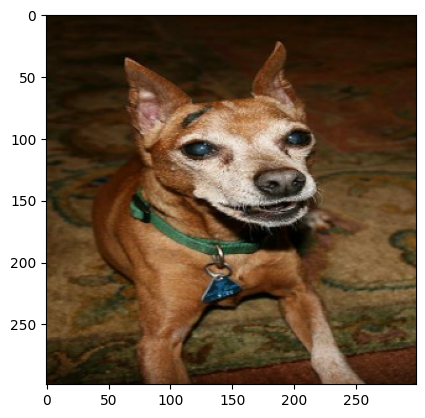

True label = Miniature pinscher
Predicted label = Miniature pinscher


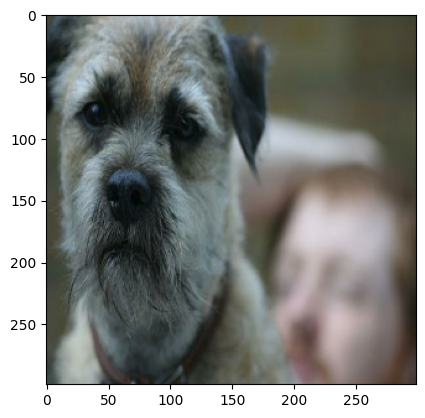

True label = Border terrier
Predicted label = Border terrier


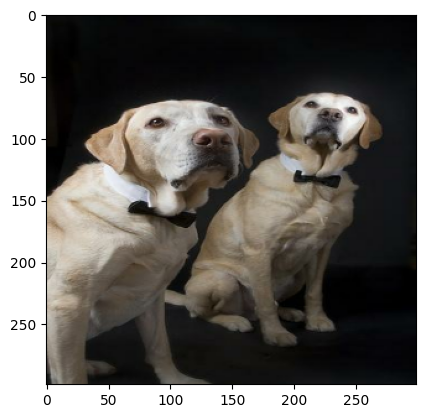

True label = Labrador retriever
Predicted label = Labrador retriever


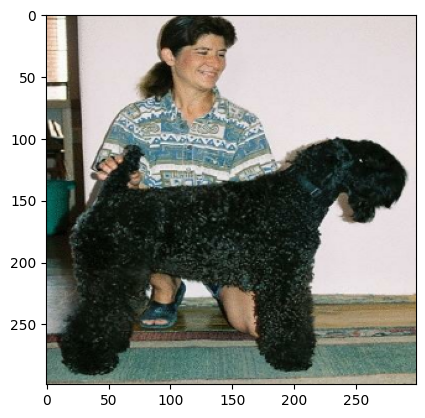

True label = Kerry blue terrier
Predicted label = Kerry blue terrier


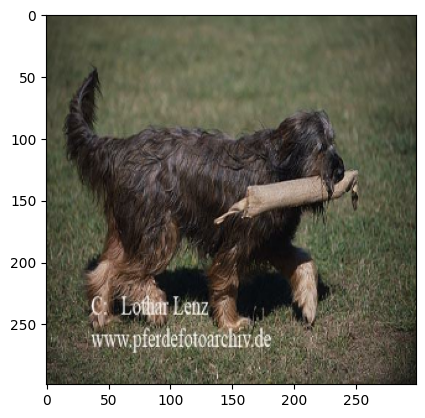

True label = Briard
Predicted label = Briard


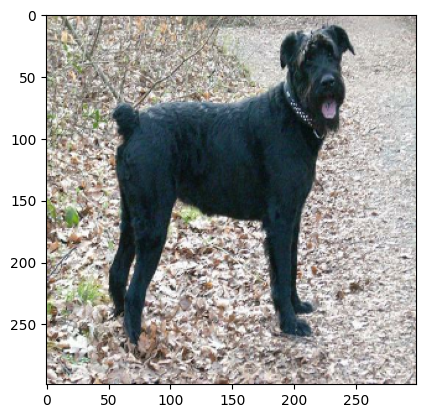

True label = Giant schnauzer
Predicted label = Giant schnauzer


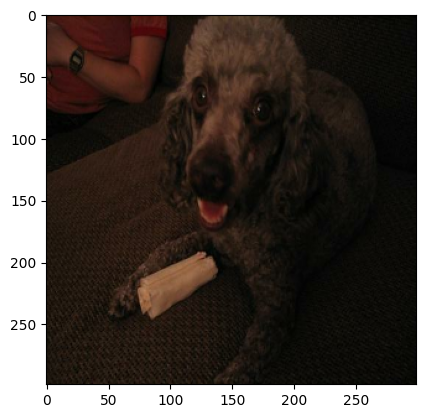

True label = Miniature poodle
Predicted label = Miniature poodle


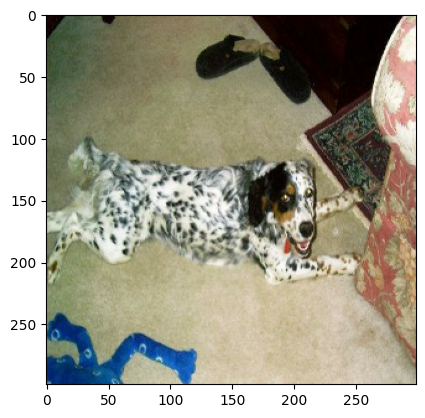

True label = English setter
Predicted label = English setter


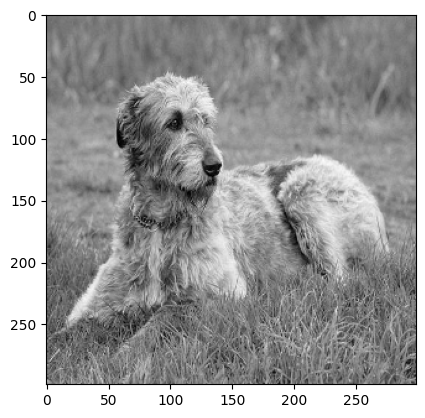

True label = Irish wolfhound
Predicted label = Irish wolfhound


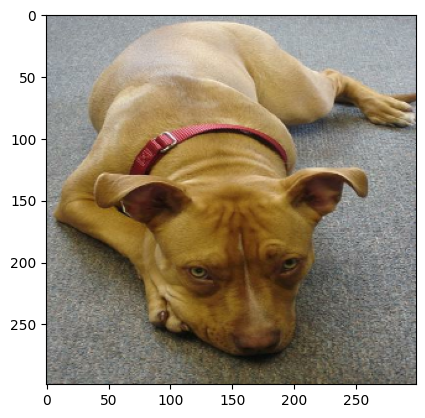

True label = American staffordshire terrier
Predicted label = American staffordshire terrier


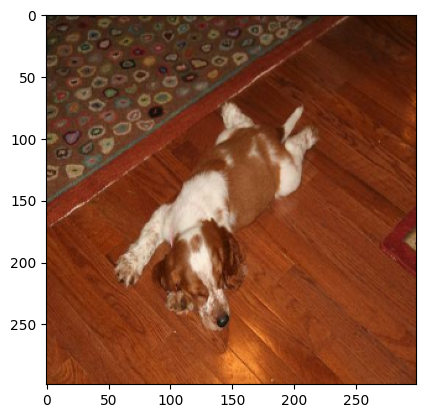

True label = Welsh springer spaniel
Predicted label = Welsh springer spaniel


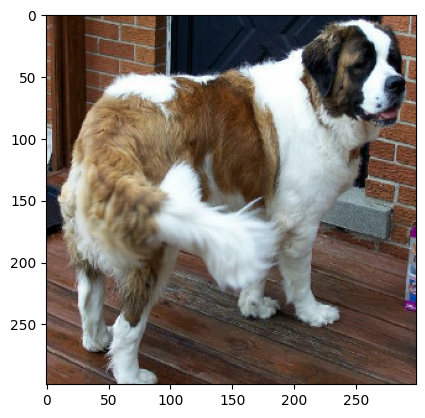

True label = Saint bernard
Predicted label = Saint bernard


In [17]:
class_names = read_labels(settings.LABELS_PATH)

for images, true_classes in test_ds.take(1):
    predictions = model.predict(images)[1]
    true_classes = true_classes.numpy()
    classes = np.argmax(predictions, axis=1)
    for index, img in enumerate(images):
        img = img.numpy()
        imgplot = plt.imshow(images[index].numpy().astype('uint8'))
        plt.show()
        print('True label =', postprocess_label(class_names[true_classes[index]]))
        print('Predicted label =', postprocess_label(class_names[classes[index]]))
        if(index > 10):
            break

In [25]:
def recognize(path, top = 1):
    class_names = read_labels(settings.LABELS_PATH)
    img = preprocessor.process_single_img(path)
    predictions = model.predict(tf.expand_dims(img, axis=0))[0]
    top_k_values, top_k_indices = tf.nn.top_k(predictions, k=top+1)
    imgplot = plt.imshow(img.numpy().astype('uint8'))
    plt.show()
    top_k_indices = top_k_indices.numpy().squeeze()
    for i in range(top):
        print(postprocess_label(class_names[top_k_indices[i]]))

1/1 [==============================] - 0s 154ms/step


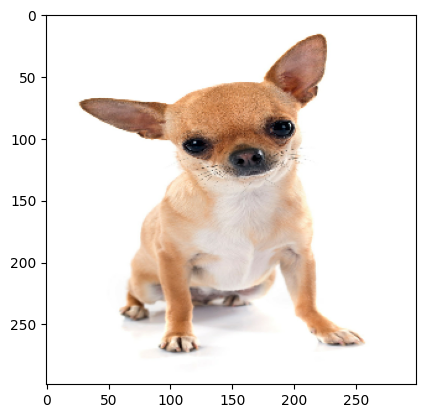

Chihuahua
1/1 [==============================] - 0s 152ms/step


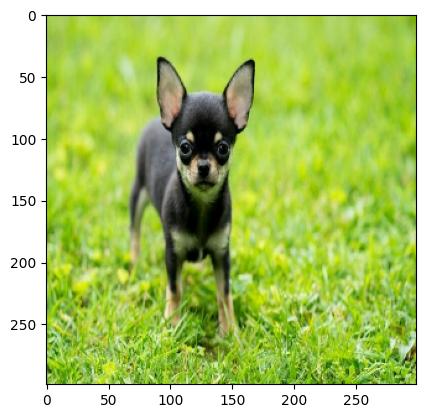

Staffordshire bullterrier
Kelpie
Boston bull
Appenzeller
Black-and-tan coonhound
1/1 [==============================] - 0s 145ms/step


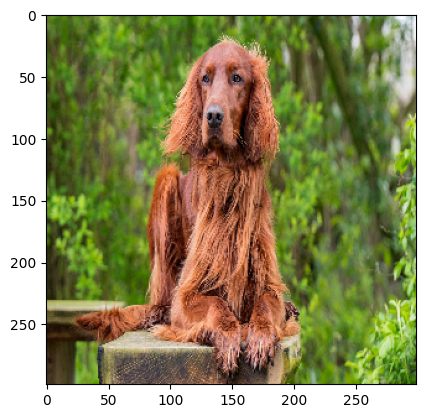

Irish setter
1/1 [==============================] - 0s 139ms/step


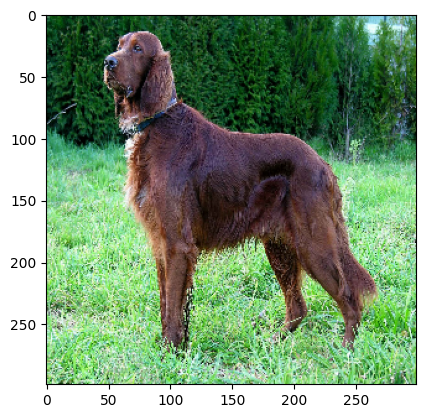

Sussex spaniel
Silky terrier
Irish setter
Irish terrier
Bloodhound
1/1 [==============================] - 0s 142ms/step


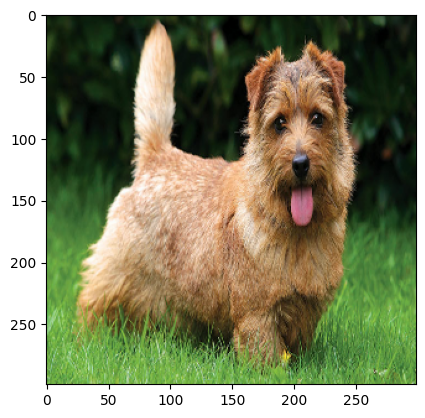

Norfolk terrier
1/1 [==============================] - 0s 117ms/step


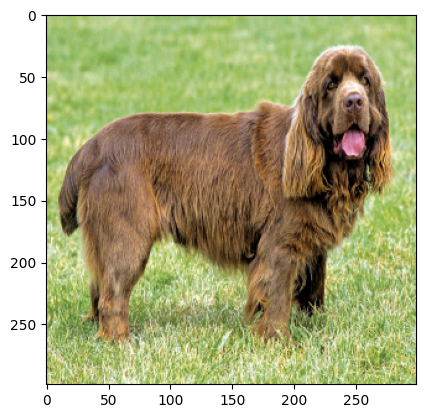

Sussex spaniel


In [28]:
recognize('Data/TestInference/chihuahua_1.jpg')
recognize('Data/TestInference/chihuahua_2.jpg', 5)
recognize('Data/TestInference/irish_setter_1.jpg')
recognize('Data/TestInference/irish_setter_2.jpg', 3)
recognize('Data/TestInference/norfolk_terier.jpg')
recognize('Data/TestInference/susseks_spaniel.jpg')